In [1]:
from interClusLib.IntervalData import IntervalData
from interClusLib.metric import *
from interClusLib.clustering import IntervalKMeans, IntervalAgglomerativeClustering
from interClusLib.visualization.HeatMap import HeatMap
from interClusLib.visualization import Interval2d, Interval3d ,IntervalParallelCoordinates ,IntervalRadarChart, Dendrogram

random_data = IntervalData.make_interval_blobs(n_samples=10000, n_clusters=3, n_dims = 4)
print("\n Random Interval Data:")
print(random_data.data)
random_data.summary()


 Random Interval Data:
      Feature_1_lower  Feature_1_upper  Feature_2_lower  Feature_2_upper  \
0           -3.433326        -0.260889         0.332943         1.956702   
1           -6.765048        -4.332229        -9.231166        -5.087500   
2           -4.393319        -0.741564         1.443331         1.543331   
3           -2.681991        -0.343861         1.149365         1.728860   
4           -2.049425         0.077937         0.676966         0.776966   
...               ...              ...              ...              ...   
9995        -2.521795         0.136009         0.558587         1.340687   
9996         2.498465         3.161112         3.806361         8.041514   
9997         1.291447         2.983135         1.421484         6.698775   
9998         2.466207         2.566207         4.141653         8.209830   
9999        -5.252579        -0.491479         0.814760         2.067606   

      Feature_3_lower  Feature_3_upper  Feature_4_lower  Featur

In [2]:

hmodel = IntervalAgglomerativeClustering(n_clusters=3, linkage='ward')
hmodel.fit(random_data.get_intervals())

print(hmodel.labels_)

dendrogram_data = hmodel.get_dendrogram_data()

print(dendrogram_data)

# 绘制基本树形图

[2 0 2 ... 1 1 2]
{'linkage_matrix': array([[4.45000000e+02, 3.00500000e+03, 3.30821789e-01, 2.00000000e+00],
       [2.37200000e+03, 4.03600000e+03, 3.38003990e-01, 2.00000000e+00],
       [1.44800000e+03, 9.11300000e+03, 3.82436736e-01, 2.00000000e+00],
       ...,
       [1.99870000e+04, 1.99930000e+04, 7.68271114e+01, 3.33300000e+03],
       [1.99940000e+04, 1.99960000e+04, 7.36290199e+02, 6.66700000e+03],
       [1.99950000e+04, 1.99970000e+04, 1.16948496e+03, 1.00000000e+04]]), 'labels': array([2, 0, 2, ..., 1, 1, 2], dtype=int32), 'n_leaves': 10000}


Requested clusters: 5, Actual clusters: 5


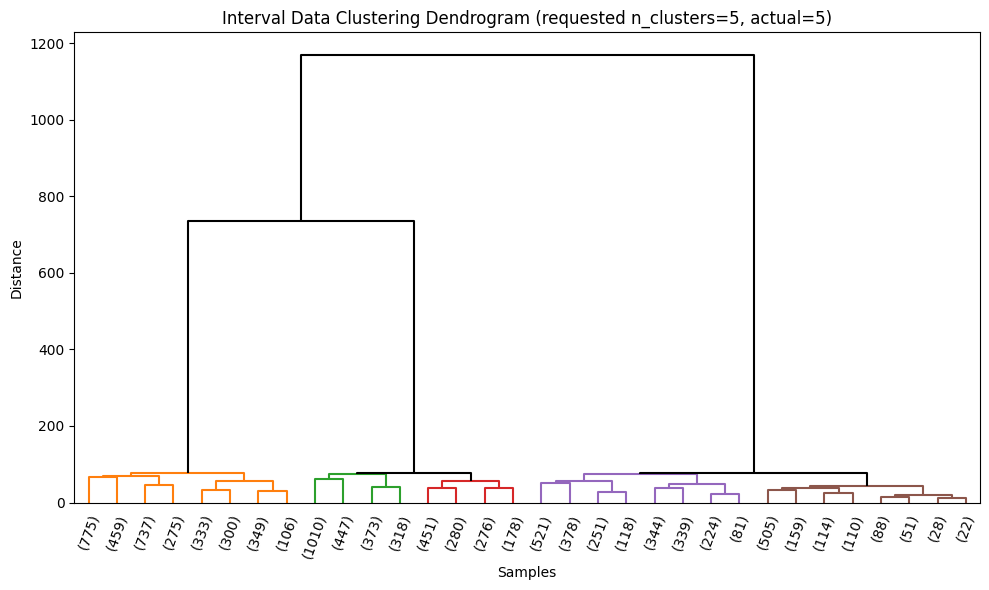

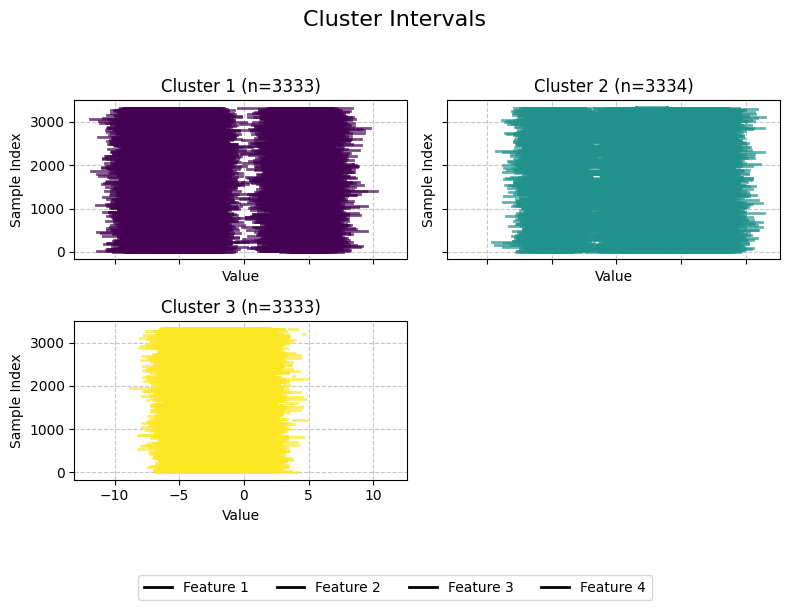

In [3]:
fig, ax, dendro_output = Dendrogram.visualize(
    dendrogram_data=dendrogram_data,
    p=4,
    n_clusters=5,
    title="Interval Data Clustering Dendrogram",
    show_distances= False,
    count_sort= 'descending',
    leaf_rotation=70.,
    truncate_mode='level',
    orientation='top',
    show_leaf_counts=True,
    figsize=(10,6)
)

fig, ax = Dendrogram.visualize_intervals(intervals = random_data.get_intervals() , labels = hmodel.labels_)

(<Figure size 1200x800 with 1 Axes>,
 <Axes: title={'center': 'Parallel Coordinates'}>)

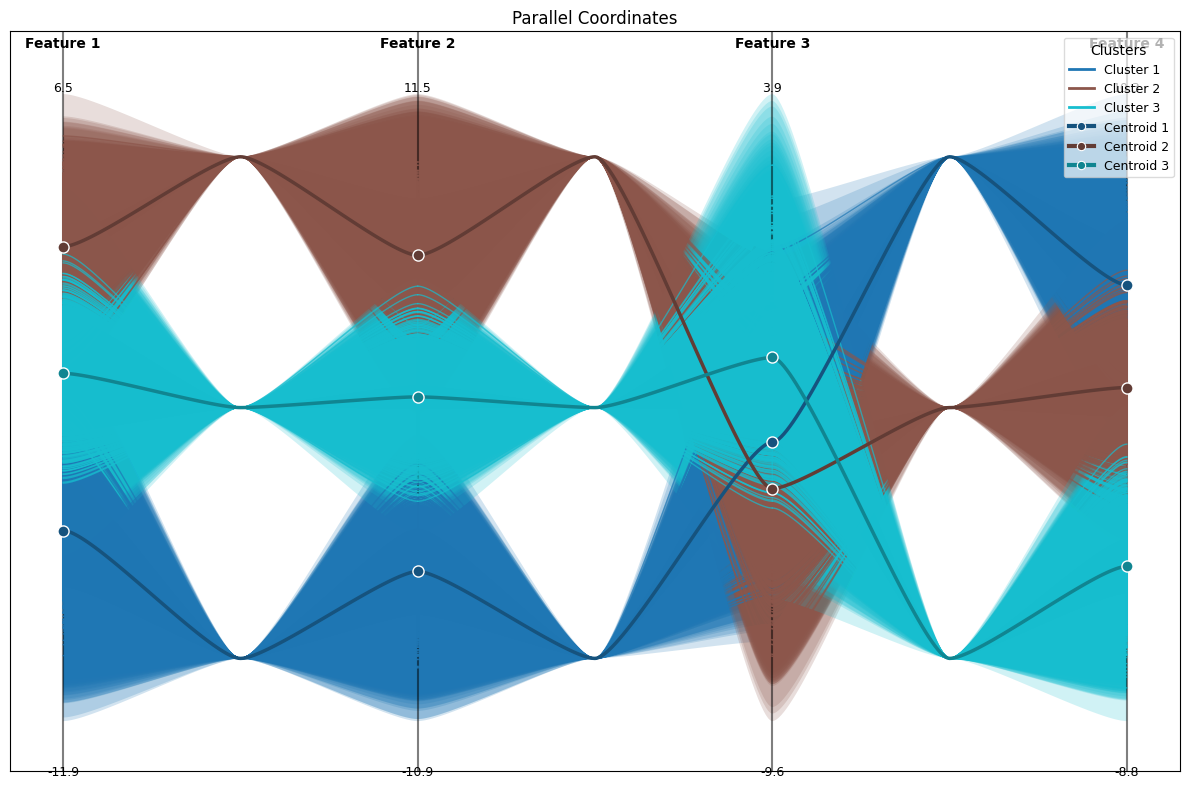

In [4]:

IntervalParallelCoordinates.visualize(intervals = random_data.get_intervals(), 
                                      feature_names= None, 
                                      centroids= hmodel.centroids_,
                                      labels=hmodel.labels_,
                                      alpha=1/6,
                                      beta = 1,
                                      use_bundling= True)


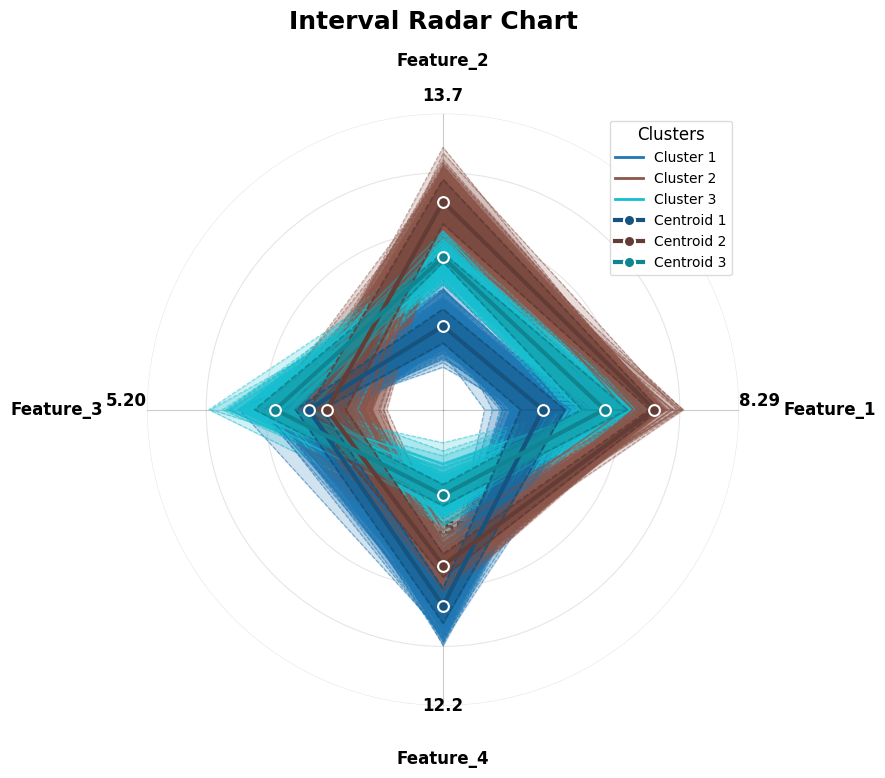

In [5]:
fig, ax = IntervalRadarChart.visualize(
    intervals=random_data.get_intervals(), 
    centroids=hmodel.centroids_,
    labels=hmodel.labels_,
    title="Interval Radar Chart",
    max_samples_per_cluster=50,
)

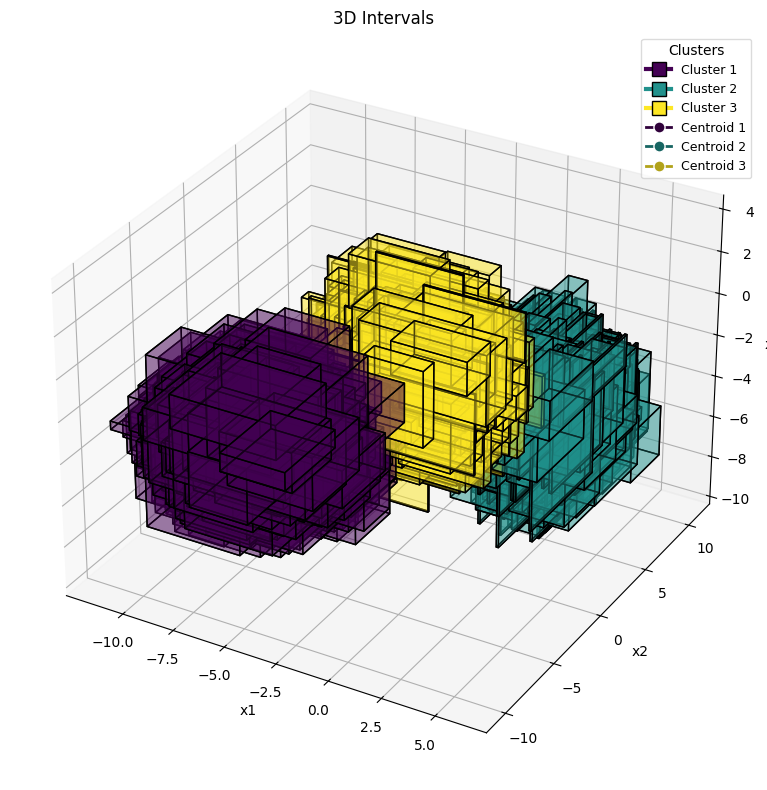

In [6]:
fig, ax = Interval3d.visualize(intervals = random_data.get_intervals(), centroids= hmodel.centroids_, labels = hmodel.labels_)

In [7]:
hmodel.compute_metrics_for_k_range(intervals=random_data.get_intervals())

Computing new linkage matrix...
Computing metrics for k=2...
Computing metrics for k=3...
Computing metrics for k=4...
Computing metrics for k=5...
Computing metrics for k=6...
Computing metrics for k=7...
Computing metrics for k=8...
Computing metrics for k=9...
Computing metrics for k=10...


{'distortion': {2: 36.914023878735314,
  3: 9.807860990992442,
  4: 9.512740738425494,
  5: 9.222213558707853,
  6: 8.933638360327983,
  7: 8.658385267477989,
  8: 8.385344588198345,
  9: 8.136582987393888,
  10: 7.916005259922393},
 'silhouette': {2: 0.6115147022460224,
  3: 0.7029416470751366,
  4: 0.5034491192324383,
  5: 0.2821124477774109,
  6: 0.08496790613653413,
  7: 0.08439162023898523,
  8: 0.08337135121866555,
  9: 0.07967119338999298,
  10: 0.0798346353099955},
 'calinski_harabasz': {2: 18521.70789293236,
  3: 48666.20224055293,
  4: 33550.69621979719,
  5: 26031.853719531522,
  6: 21560.604144613924,
  7: 18589.444614957687,
  8: 16497.473865575725,
  9: 14913.31630870398,
  10: 13655.230601566083},
 'davies_bouldin': {2: 0.5704527325460673,
  3: 0.4321834325399023,
  4: 1.629185931089601,
  5: 2.374893911251798,
  6: 2.843572114929891,
  7: 2.6666234942642855,
  8: 2.5532274765381446,
  9: 2.510168597561062,
  10: 2.338630525870902},
 'dunn': {2: 0.3252260041396617,
  3: 